<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DeepLearning/blob/main/03.NLP-with-tensorflow2.0/ch03_01_NLP%EA%B8%B0%EC%B4%88_%ED%85%8D%EC%8A%A4%ED%8A%B8%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch03.01 NLP기초 - 텍스트 처리
---

* 날짜: 2022-07-13
* 이름: 김민규

## 학습내용
    - 텍스트 전처리 과정을 이해한다.
      - 텍스트 토큰화
      - 텍스트 인덱싱
      - 원-핫 인코딩
      - 텍스트 임베딩
    - 간단한 문장을 분류하는 딥러닝 모델을 구현한다.


```
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning
```

In [1]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

fatal: destination path 'SkillTreePython-DeepLearning' already exists and is not an empty directory.


```
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/02.케라스_창시자에게_배우는_딥러닝/scripts')
from import_lib import *
```

In [2]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/02.케라스_창시자에게_배우는_딥러닝/scripts')
from import_lib import *

## 텍스트 데이터 처리
---

### **| 전처리 구현하기**

**딕셔너리 제작**

'''
"문장이 이런식으로 이루어져 있습니다."
# 1. 토큰화
"문장 이 이런 식 으로 이루 어 져 있습니다." # -> 어떻게 토큰화 할지 라이브러리 존재
"hello eveyone"
# 모든 데이터는 숫자
2. 단어인덱싱
#### 모든 토큰에 대해 숫자로 매핑
#### 인덱싱 위해서는 딕셔너리가 필요

In [3]:
samples = ['very nice movie',
           'this movie is bad',
           'it is so bad',
           'wow it is a good movie']

word_dict = {}
for sample in samples:
    #print(sample)
    # 토큰화
    for token in sample.split(' '):
        #print(token)
        if token not in word_dict:
            word_dict[token]=len(word_dict)+1
print(word_dict)
print('모든 단어 개수: ', len(word_dict))

{'very': 1, 'nice': 2, 'movie': 3, 'this': 4, 'is': 5, 'bad': 6, 'it': 7, 'so': 8, 'wow': 9, 'a': 10, 'good': 11}
모든 단어 개수:  11


In [ ]:
# 클래스가 3개 일때
# 1: 1 0 0
# 2: 0 1 0
# 3: 0 0 1

# 문장에서는 클래스 개수가 단어 개수만큼 (5000개 단어 ~ 10000개 단어 ~)
# 1 : 1 0 0 ...
# 2 : 0 1 0 ...
# ...

# 5000 : 0 0 ... 1

#### **단어 인덱싱**

In [4]:
# 문장 -> 토큰 -> 숫자
def word_indexing(sample, word_dict):
  indexed = []  
  for token in sample.split(' '):
    num = word_dict[token]
    indexed.append(num)
  return np.array(indexed)
idx = 1
samples[idx], word_indexing(samples[idx], word_dict)

('this movie is bad', array([4, 3, 5, 6]))

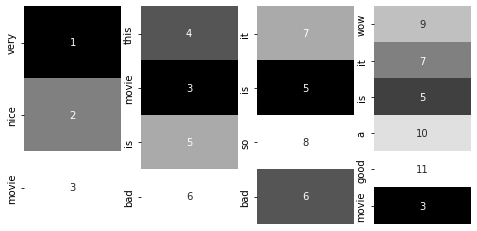

In [5]:
plt.figure(figsize=(len(samples)*2, 4))
for i, sample in enumerate(samples):
  indexed = word_indexing(sample, word_dict)
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(indexed.reshape(len(indexed), 1), cmap='gray', 
              annot=True, cbar=False,
              yticklabels=sample.split(' '),
              xticklabels=[])
plt.show()

#### **원-핫 인코딩**
##### 문장을 2차원 텐서로 변경

In [6]:
# sample_mxlen : 한 문장안에 몇개의 토큰까지 허락
# total_words : 딕셔너리 안에 있는 모든 단어 수
def word_onehot(sample, sample_mxlen, total_words):
  onehot = np.zeros((sample_mxlen, total_words+1)) # 단어인덱스 1~11, 파이썬 인덱스 0~11 총 12개 
  for i, token in enumerate(sample.split(' ')):
    if i == sample_mxlen: break # 샘플이 너무길면 자르기
    index = word_dict[token] # 토큰이 몇번째 해당하는지 반환
    onehot[i, index]=1 # i번째 토큰, index 해당하는 자리에 1을 할당
  return onehot

idx = 3
print(samples[idx])
print(word_indexing(samples[idx], word_dict))
print(word_onehot(samples[idx], 5, len(word_dict)))

wow it is a good movie
[ 9  7  5 10 11  3]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


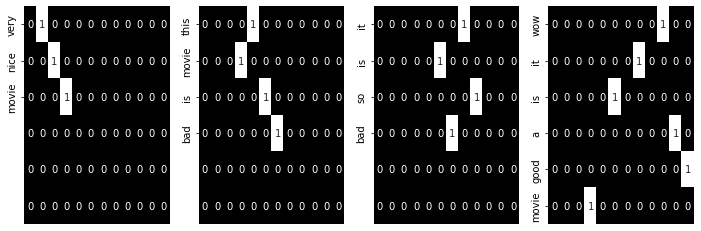

In [8]:
plt.figure(figsize=(len(samples)*3, 4))
for i, sample in enumerate(samples):
  onehot = word_onehot(samples[i], 6, len(word_dict))
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(onehot, cmap='gray', 
              annot=True, cbar=False,
              yticklabels=sample.split(' '),
              xticklabels=[])
plt.show()

In [ ]:
# sample_mxlen : 한 문장안에 몇개의 토큰까지 하락
# total_words : 딕셔너리 안에 있는 모든 단어 수
def word_onehot(sample, sample_mxlen, total_words):
    onehot = np.zeros((sample_mxlen, total_words+1)) # 단어 인덱스 1 ~ 11, 파이썬 인덱스 0 ~ 11 총 12개
    for i, token in enumerate(sample.split(' ')):
        if i==sample_mxlen: break # 샘플이 너무길면 자르기
        index = word_dict[token] # 토큰이 몇 번째 해당하는지 반환
        onehot[i, index]=1 # i번째 토큰, index 해당하는 자리에 1 을 할당
    return onehot

idx = 3
print(samples[idx])
print(word_indexing(samples[idx], word_dict))
samples[idx], word_onehot(samples[idx], 6, len(word_dict))

wow it is a good movie
[ 9  7  5 10 11  3]


('wow it is a good movie',
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]))

### | **텐서플로우 케라스 Tokenizer**


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer()
tk.fit_on_texts(samples)

In [10]:
print('생성된 딕셔너리: ', tk.word_index)
print('단어 카운트 :', tk.word_counts)
print('단어 하나가 몇개의 문장에 포함되어 있는가', tk.word_docs)
print('문장(샘플) 카운트: ', tk.document_count)

생성된 딕셔너리:  {'movie': 1, 'is': 2, 'bad': 3, 'it': 4, 'very': 5, 'nice': 6, 'this': 7, 'so': 8, 'wow': 9, 'a': 10, 'good': 11}
단어 카운트 : OrderedDict([('very', 1), ('nice', 1), ('movie', 3), ('this', 1), ('is', 3), ('bad', 2), ('it', 2), ('so', 1), ('wow', 1), ('a', 1), ('good', 1)])
단어 하나가 몇개의 문장에 포함되어 있는가 defaultdict(<class 'int'>, {'movie': 3, 'very': 1, 'nice': 1, 'this': 1, 'bad': 2, 'is': 3, 'so': 1, 'it': 2, 'a': 1, 'good': 1, 'wow': 1})
문장(샘플) 카운트:  4


#### **단어 인덱싱**

In [11]:
seqs = tk.texts_to_sequences(samples)
print('단어 인덱싱 결과', seqs)

단어 인덱싱 결과 [[5, 6, 1], [7, 1, 2, 3], [4, 2, 8, 3], [9, 4, 2, 10, 11, 1]]


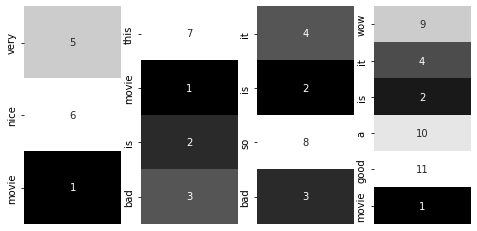

In [12]:
plt.figure(figsize=(len(samples)*2, 4))
for i, sample in enumerate(samples):
  indexed = np.array(seqs[i])
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(indexed.reshape(len(indexed), 1), cmap='gray', 
              annot=True, cbar=False,
              yticklabels=sample.split(' '),
              xticklabels=[])
plt.show()

#### **패딩**
길이를 맞추어 줍니다.

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pads = pad_sequences(seqs, 6)
print('패딩 결과:\n', pads, pads.shape)

패딩 결과:
 [[ 0  0  0  5  6  1]
 [ 0  0  7  1  2  3]
 [ 0  0  4  2  8  3]
 [ 9  4  2 10 11  1]] (4, 6)


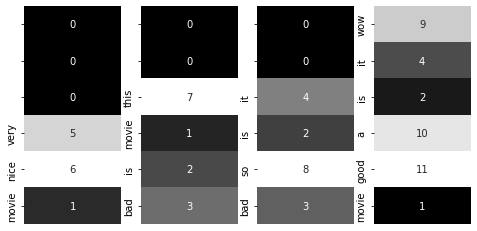

In [14]:
plt.figure(figsize=(len(samples)*2, 4))
for i, sample in enumerate(samples):
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(pads[i].reshape(len(indexed), 1), cmap='gray', 
              annot=True, cbar=False,
              yticklabels=['']*(6-len(sample.split(' ')))+sample.split(' '),
              xticklabels=[])
plt.show()

#### **원핫 인코딩**

In [15]:
len(word_dict)

11

In [16]:
# 인풋 시퀀스는 길이가 동일!
onehots = utils.to_categorical(pads, num_classes=len(word_dict)+1) # 단어 개수 +1 해주기
# +1 하는 이유는 단어가 없거나 / 딕셔너리에 존재하지 않는 단어는 첫번째 클래스에 할당
print(pads.shape, onehots.shape)
# 12는 num_classes

(4, 6) (4, 6, 12)


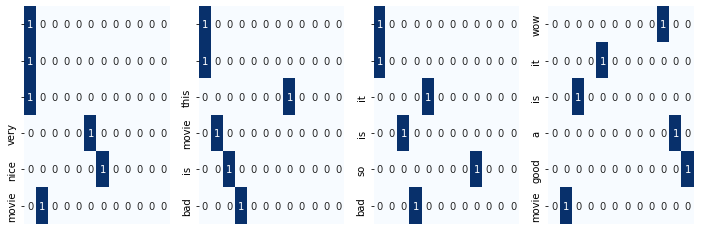

In [17]:
plt.figure(figsize=(len(samples)*3, 4))
for i, sample in enumerate(samples):
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(onehots[i], cmap='Blues', 
              annot=True, cbar=False,
              yticklabels=['']*(6-len(sample.split(' ')))+sample.split(' '),
              xticklabels=[])
plt.show()

In [ ]:
# 원핫 인코딩 결과
# 행 : 샘플 하나의 최대 길이
# 열 : 단어 하나가 몇개의 dimension으로 표현될 수 있는가


#### **단어 임베딩**

In [ ]:
# 단어 하나가 표현할 수 있는 dimension이 자유롭다. 
# 원핫 인코딩 처럼 단어 하나를 딕셔너리에 있는 단어 수의 크기만큼의 dimension으로 표현 하지 않아도 됩니다.
# 1: word, 2: hello, 3: any
# my   1 0 0 0
# word 0 1 0 0

In [18]:
pads.shape

(4, 6)

In [51]:
# 인풋 : 패딩된 sequence
# 최대 길이 +1 하는 이유: 처음 시작 비워 놓기(0)
# 모든 영어 단어 수가 11개 이고, +1 이므로 input이 12개
embedding_layer = layers.Embedding(input_dim=12 , output_dim=3) # 원핫처리 후 임베딩

In [49]:
embeded = embedding_layer(pads[0])
embeded.shape
# 학습이 필요한 레이어

TensorShape([6, 3])

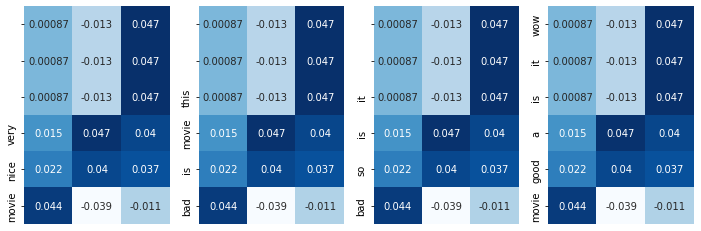

In [50]:
plt.figure(figsize=(len(samples)*3, 4))
for i, sample in enumerate(samples):
  embeded = embedding_layer(pads[0])
  plt.subplot(1, len(samples), i+1)
  sns.heatmap(embeded, cmap='Blues', 
              annot=True, cbar=False,
              yticklabels=['']*(6-len(sample.split(' ')))+sample.split(' '),
              xticklabels=[])
plt.show()

## 간단 예제
---

### | **텍스트 전처리**

In [31]:
docs = ["너무 재미 있네요",
        "최고 예요",
        "참 잘 만든 영화 예요",
        "추천 하고 싶은 영화 입니다",
        "한번 더 보고 싶네요",
        "글쎄 요","별로 예요","생각 보다 지루 하네요",
        "연기 가 어색 해요","재미 있어서 한번 더 볼거에요", "별로 재미 가 없어요", "재미 있고 잘 만든 영화 입니다",
        "재미 가 별로 없어요", "별로 예요"]
classes = np.array([1,1,1,1,1,0,0,0,0,1,0,1,0,0]) # 긍정 1 부정 0
print(len(docs), classes.shape)

# 토큰
token = Tokenizer()
token.fit_on_texts(docs)
print('딕셔너리: ', token.word_index)
print('딕셔너리 총 단어 개수: ', len(token.word_index))

# 인덱싱
x = token.texts_to_sequences(docs)
print(x)

# 패딩
x_pad = pad_sequences(x, 6) # 한 문자에 최대 몇 개의 단어 ( 최대 길이가 6개 )
print('패딩 결과\n:',x_pad, x_pad.shape)

14 (14,)
딕셔너리:  {'재미': 1, '예요': 2, '별로': 3, '영화': 4, '가': 5, '잘': 6, '만든': 7, '입니다': 8, '한번': 9, '더': 10, '없어요': 11, '너무': 12, '있네요': 13, '최고': 14, '참': 15, '추천': 16, '하고': 17, '싶은': 18, '보고': 19, '싶네요': 20, '글쎄': 21, '요': 22, '생각': 23, '보다': 24, '지루': 25, '하네요': 26, '연기': 27, '어색': 28, '해요': 29, '있어서': 30, '볼거에요': 31, '있고': 32}
딕셔너리 총 단어 개수:  32
[[12, 1, 13], [14, 2], [15, 6, 7, 4, 2], [16, 17, 18, 4, 8], [9, 10, 19, 20], [21, 22], [3, 2], [23, 24, 25, 26], [27, 5, 28, 29], [1, 30, 9, 10, 31], [3, 1, 5, 11], [1, 32, 6, 7, 4, 8], [1, 5, 3, 11], [3, 2]]
패딩 결과
: [[ 0  0  0 12  1 13]
 [ 0  0  0  0 14  2]
 [ 0 15  6  7  4  2]
 [ 0 16 17 18  4  8]
 [ 0  0  9 10 19 20]
 [ 0  0  0  0 21 22]
 [ 0  0  0  0  3  2]
 [ 0  0 23 24 25 26]
 [ 0  0 27  5 28 29]
 [ 0  1 30  9 10 31]
 [ 0  0  3  1  5 11]
 [ 1 32  6  7  4  8]
 [ 0  0  1  5  3 11]
 [ 0  0  0  0  3  2]] (14, 6)


### | **모델 구현 및 학습**

#### 단어 하나가 웟-핫인코딩 되면 크기 몇의 32+1차원의 벡터로 표현?
##### -> 단어 갯수가 32개 이기 때문에, (32+1)(딕셔너리에 없는/비어있는 단어)

In [36]:
def create_model():
    x = layers.Input(shape=6)
    y = layers.Embedding(33, 8)(x) # 원핫 처리할 때 몇개로 표현이 되느냐를 고민
    y = layers.Flatten()(y)
    y = layers.Dense(1, activation='sigmoid')(y) # 이진분류 
    return models.Model(x,y)
model=create_model()
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 6)]               0         
                                                                 
 embedding_5 (Embedding)     (None, 6, 8)              264       
                                                                 
 flatten_2 (Flatten)         (None, 48)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 49        
                                                                 
Total params: 313
Trainable params: 313
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])
model.fit(x_pad, classes, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 681ms/step - loss: 0.5971 - acc: 0.9286
Epoch 2/20
1/1 [==============================] - 0s 8ms/step - loss: 0.5944 - acc: 0.9286
Epoch 3/20
1/1 [==============================] - 0s 8ms/step - loss: 0.5917 - acc: 0.9286
Epoch 4/20
1/1 [==============================] - 0s 7ms/step - loss: 0.5890 - acc: 0.9286
Epoch 5/20
1/1 [==============================] - 0s 7ms/step - loss: 0.5862 - acc: 0.9286
Epoch 6/20
1/1 [==============================] - 0s 8ms/step - loss: 0.5835 - acc: 0.9286
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 0.5807 - acc: 0.9286
Epoch 8/20
1/1 [==============================] - 0s 9ms/step - loss: 0.5779 - acc: 0.9286
Epoch 9/20
1/1 [==============================] - 0s 9ms/step - loss: 0.5751 - acc: 0.9286
Epoch 10/20
1/1 [==============================] - 0s 8ms/step - loss: 0.5723 - acc: 0.9286
Epoch 11/20
1/1 [==============================] - 0s 9ms/step - loss: 0.5695 - acc: 0

### **| 예측**

In [42]:
# 0.5기준, 0이면 부정, 1이면 긍정
preds = model.predict(x_pad)
for i in range(len(preds)):
    print(preds[i])

[0.5305408]
[0.4900122]
[0.6075897]
[0.6341308]
[0.5473289]
[0.40846577]
[0.45123926]
[0.3706982]
[0.3793451]
[0.62946963]
[0.44474536]
[0.6487885]
[0.40553546]
[0.45123926]


In [43]:
preds = model.predict(x_pad)
for i in range(len(preds)):
    print(docs[i], np.round(preds[i][0]))

너무 재미 있네요 1.0
최고 예요 0.0
참 잘 만든 영화 예요 1.0
추천 하고 싶은 영화 입니다 1.0
한번 더 보고 싶네요 1.0
글쎄 요 0.0
별로 예요 0.0
생각 보다 지루 하네요 0.0
연기 가 어색 해요 0.0
재미 있어서 한번 더 볼거에요 1.0
별로 재미 가 없어요 0.0
재미 있고 잘 만든 영화 입니다 1.0
재미 가 별로 없어요 0.0
별로 예요 0.0


In [44]:
docs_test = ['생각 보다 별로 에요', '재미 있는 영화 입니다.']
# 인덱싱
x_test = token.texts_to_sequences(docs_test)
print(x_test)

# 패딩
x_test = pad_sequences(x_test, 6) # 한 문자에 최대 몇 개의 단어 ( 최대 길이가 6개 )
print('패딩 결과\n:',x_test, x_test.shape)

[[23, 24, 3], [1, 4, 8]]
패딩 결과
: [[ 0  0  0 23 24  3]
 [ 0  0  0  1  4  8]] (2, 6)


In [47]:
# 0.5기준, 0이면 부정, 1이면 긍정
preds = model.predict(x_test)
for i in range(len(preds)):
    print(docs_test[i], np.round(preds[i][0]))

생각 보다 별로 에요 0.0
재미 있는 영화 입니다. 1.0


# 6.1 Using Word Embeddings

In [52]:
import keras
keras.__version__

'2.8.0'

In [53]:
from keras.layers import Embedding

# Embedding 층은 적어도 두 개의 매개변수를 받습니다.
# 가능한 토큰의 개수(여기서는 1,000으로 단어 인덱스 최댓값 +1 입니다)와 임베딩 차원(64) 입니다.
embedding_layer = Embedding(1000, 64)

In [55]:
from keras.datasets import imdb
from keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다.)
maxlen = 20

# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환합니다.
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [58]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
# 나중에 임베딩된 입력을 Flatten 층에서 펼치기 위해 Embedding 층에 input_length를 지정합니다.
model.add(Embedding(10000, 8, input_length=maxlen))
# Embedding 층의 출력 크기는 (samples, maxlen, 8)이 됩니다.

# 3D 임베딩 텐서를 (samples, maxlen*8) 크기의 2D 텐서로 펼칩니다.
model.add(Flatten())

# 분류기를 추가합니다.
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 20, 8)             80000     
                                                                 
 flatten_5 (Flatten)         (None, 160)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
625/625 [==============================] - 2s 3ms/step - loss: 0.6616 - acc: 0.6406 - val_loss: 0.6087 - val_acc: 0.6998
Epoch 2/300
625/625 [==============================] - 1s 2ms/step - loss: 0.5320 - acc: 0.7544 - val_loss: 0.5229 - val_acc: 0.7304
Epoch 3/300
625/625 [===========================

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
# 원본 IMDB 텍스트 내려받기
import os

imdb_dir = '/content/drive/MyDrive/딥러닝 프레임워크실무/06. 딥러닝/NLP/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding='utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [67]:
# 데이터 토큰화
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # 100개 단어 이후는 버립니다
training_samples = 200  # 훈련 샘플은 200개입니다
validation_samples = 10000  # 검증 샘플은 10,000개입니다
max_words = 10000  # 데이터셋에서 가장 빈도 높은 10,000개의 단어만 사용합니다

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('데이터 텐서의 크기:', data.shape)
print('레이블 텐서의 크기:', labels.shape)

# 데이터를 훈련 세트와 검증 세트로 분할합니다.
# 샘플이 순서대로 있기 때문에 (부정 샘플이 모두 나온 후에 긍정 샘플이 옵니다) 
# 먼저 데이터를 섞습니다.
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

0개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기: (0, 100)
레이블 텐서의 크기: (0,)


In [ ]:
glove_dir = './datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('%s개의 단어 벡터를 찾았습니다.' % len(embeddings_index))

In [ ]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # 임베딩 인덱스에 없는 단어는 모두 0이 됩니다.
            embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
training_samples = 2000
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding="utf8")
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [ ]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)